# 📘 model_comparison_analysis.ipynb
# ===============================================================
# STEP 1: Imports & Setup
# ===============================================================

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot settings
plt.style.use('ggplot')
sns.set(font_scale=1.1)

# ===============================================================
# STEP 2: Load Data
# ===============================================================

In [3]:
# Path to your results file
results_path = Path("combined_summary.json")

with open(results_path, "r") as f:
    data = json.load(f)

# Flatten JSON structure into rows
rows = []
for file_entry in data:
    file_name = file_entry["file"]
    for model_name, stats in file_entry["models"].items():
        rows.append({"file": file_name, "model": model_name, **stats})

df = pd.DataFrame(rows)
print("✅ Loaded DataFrame shape:", df.shape)
display(df.head())

✅ Loaded DataFrame shape: (83, 20)


,file,model,framework,device,compute_type,duration_sec,processing_time_sec,rtf,avg_cpu,max_cpu,avg_mem,max_mem,avg_gpu,max_gpu,avg_gpu_mem,max_gpu_mem,WER,CER,reference_len_chars,prediction_len_chars
0,english_clean_1min.mp3,faster-whisper_large-v3,ctranslate2,cuda,float16,66.08,0.4666,0.0071,0.000000,0.0,38.400000,38.4,83.000000,83.0,49.223664,49.223664,0.0556,0.0189,846.0,851.0
1,english_clean_1min.mp3,openai-whisper_large-v3,pytorch,cuda,float16,66.08,45.7179,0.6919,6.686957,24.5,51.934783,55.2,97.978261,100.0,98.989248,99.123575,NaN,NaN,NaN,NaN
2,english_clean_1min.mp3,whisper-cpp_large-v3,ggml,cpu,int8,66.08,56.0292,0.8479,14.367857,22.0,49.430357,49.9,4.571429,61.0,12.793599,13.089086,0.0370,0.0225,846.0,856.0
3,english_clean_1min.mp3,whisperx_large-v2,pytorch+alignment,cuda,float16,66.08,3.7856,0.0573,11.575000,16.0,44.700000,45.1,68.000000,94.0,58.120449,61.137058,0.0679,0.0225,846.0,832.0
4,english_multi_accent_noisy_background_3min.mp3,faster-whisper_large-v3,ctranslate2,cuda,float16,228.36,0.5540,0.0024,0.000000,0.0,39.300000,39.3,1.000000,1.0,51.276974,51.276974,0.1297,0.0713,3043.0,2980.0


# ===============================================================
# STEP 3: Statistical Summary
# ===============================================================

In [4]:
# Overview of numeric columns
stats_summary = df.describe().T
display(stats_summary)

# Compute mean RTF and WER per model
summary = (
    df.groupby("model")[["processing_time_sec", "rtf", "WER", "CER", "avg_cpu", "avg_gpu", "avg_mem"]]
    .mean()
    .sort_values("rtf")
)
display(summary)

,count,mean,std,min,25%,50%,75%,max
duration_sec,83.0,127.393614,202.125624,13.370000,29.650000,64.710000,95.480000,936.330000
processing_time_sec,83.0,84.722980,230.141681,0.292000,1.322350,16.368300,51.884800,1563.027900
rtf,83.0,0.602918,0.893914,0.001300,0.021950,0.264100,0.838850,5.438100
avg_cpu,83.0,7.300287,5.283245,0.000000,3.550000,7.333333,11.387500,18.775258
max_cpu,83.0,12.183133,8.693351,0.000000,5.500000,13.500000,18.000000,38.800000
avg_mem,83.0,46.069532,4.181894,38.400000,42.750000,45.350000,49.976176,51.934783
max_mem,83.0,46.473494,4.541599,38.400000,42.850000,45.600000,50.450000,55.900000
avg_gpu,83.0,62.766030,39.604337,0.000000,4.875000,83.111111,96.146274,99.405630
max_gpu,83.0,78.289157,32.016585,0.000000,70.000000,94.000000,100.000000,100.000000
avg_gpu_mem,83.0,56.138164,30.660433,10.577305,50.123609,58.120449,79.766882,99.089725


,processing_time_sec,rtf,WER,CER,avg_cpu,avg_gpu,avg_mem
model,,,,,,,
faster-whisper_large-v3,0.409562,0.007286,0.241600,0.208690,0.121429,76.857143,40.609524
whisperx_large-v2,7.738990,0.080519,0.261176,0.176533,8.380858,70.845030,44.198797
whisper-cpp_large-v3,125.104395,0.845305,0.867265,0.826715,14.507518,3.001902,50.309446
openai-whisper_large-v3,207.561895,1.490105,NaN,NaN,6.534546,97.514135,49.362261



# ===============================================================
# STEP 4: Visualization Section
# ===============================================================

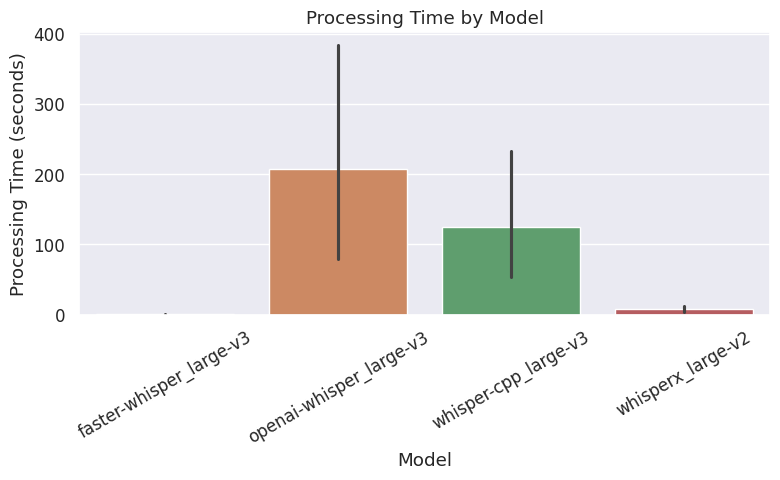

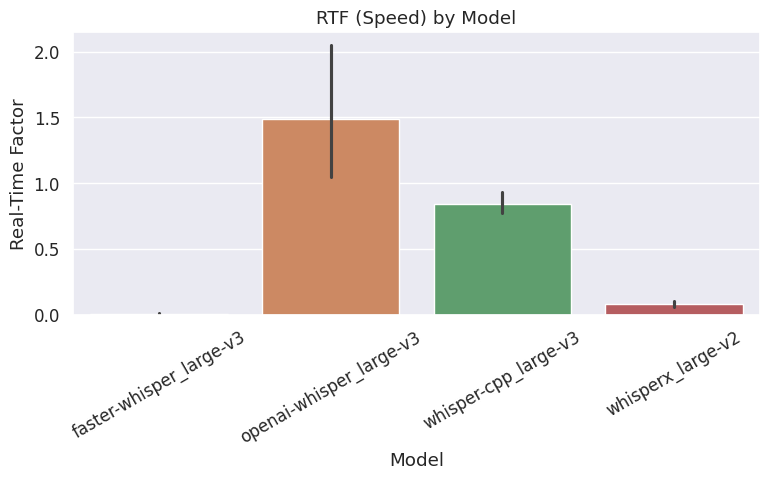

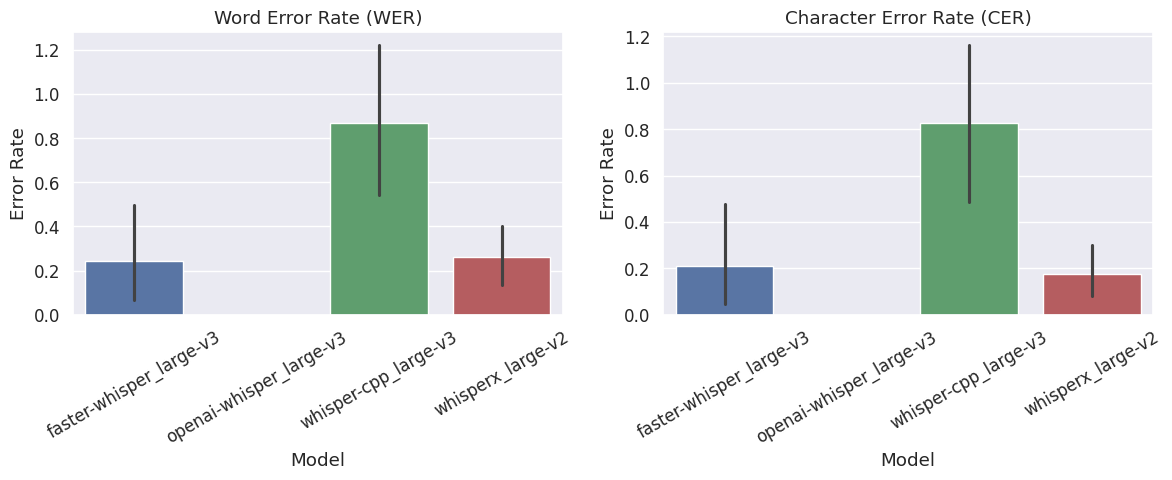

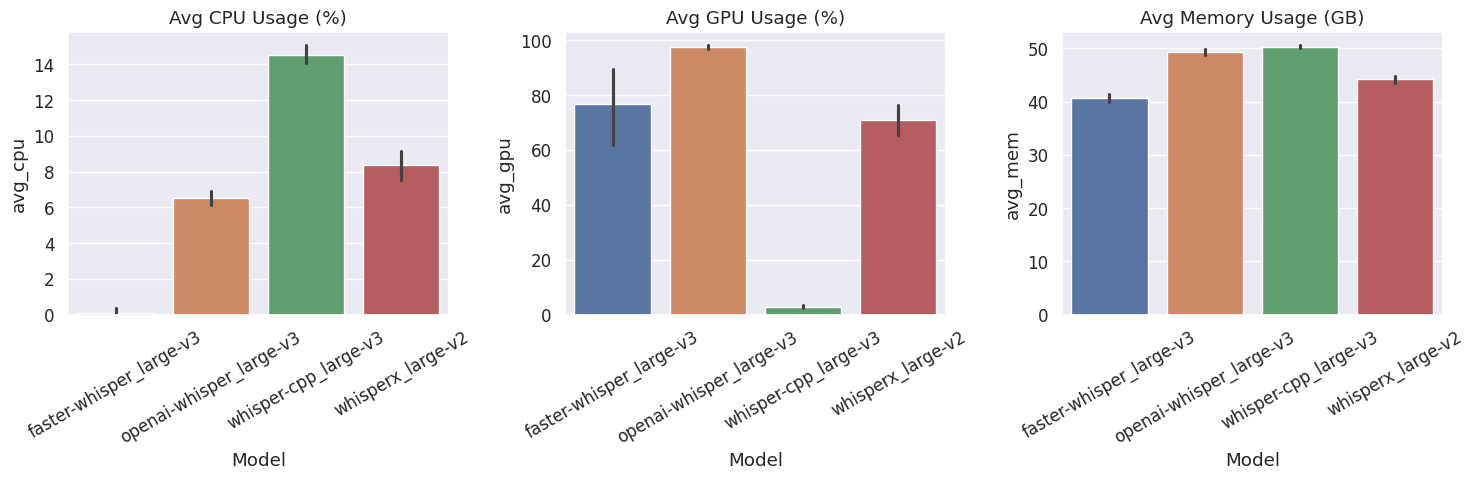

In [19]:
# --- Bar Chart: Processing Time per Model ---
plt.figure(figsize=(8,5))
sns.barplot(x="model", y="processing_time_sec", data=df, hue="model", dodge=False)
plt.title("Processing Time by Model")
plt.ylabel("Processing Time (seconds)")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# --- Bar Chart: Real-Time Factor (RTF) per Model ---
plt.figure(figsize=(8,5))
sns.barplot(x="model", y="rtf", data=df, hue="model", dodge=False)
plt.title("RTF (Speed) by Model")
plt.ylabel("Real-Time Factor")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# --- Accuracy Comparison (WER & CER) ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(ax=axes[0], x="model", y="WER", data=df, hue="model", dodge=False)
axes[0].set_title("Word Error Rate (WER)")
sns.barplot(ax=axes[1], x="model", y="CER", data=df, hue="model", dodge=False)
axes[1].set_title("Character Error Rate (CER)")
for ax in axes:
    ax.set_xlabel("Model")
    ax.set_ylabel("Error Rate")
    ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

# --- Resource Utilization (CPU, GPU, MEM) ---
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(ax=axes[0], x="model", y="avg_cpu", data=df, hue="model", dodge=False)
axes[0].set_title("Avg CPU Usage (%)")

sns.barplot(ax=axes[1], x="model", y="avg_gpu", data=df, hue="model", dodge=False)
axes[1].set_title("Avg GPU Usage (%)")

sns.barplot(ax=axes[2], x="model", y="avg_mem", data=df, hue="model", dodge=False)
axes[2].set_title("Avg Memory Usage (GB)")

for ax in axes:
    ax.set_xlabel("Model")
    ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()



# ===============================================================
# ADDITIONAL ADVANCED VISUALIZATIONS
# ===============================================================

# --- 1. Radar Chart: Model Performance Overview ---

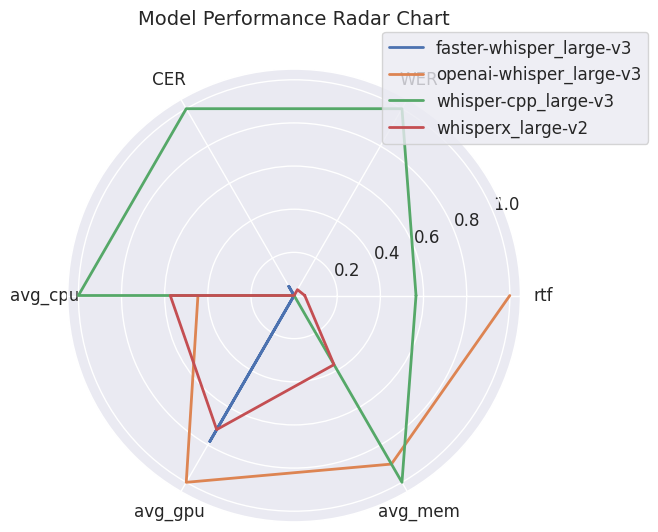

In [20]:
metrics = ["rtf", "WER", "CER", "avg_cpu", "avg_gpu", "avg_mem"]
radar_data = df.groupby("model")[metrics].mean().reset_index()

# Normalize metrics for radar scale (0–1)
radar_norm = radar_data.copy()
radar_norm[metrics] = (radar_norm[metrics] - radar_norm[metrics].min()) / (radar_norm[metrics].max() - radar_norm[metrics].min())

# Prepare angles
labels = metrics
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(7,7))
for i, row in radar_norm.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    plt.polar(angles, values, label=row["model"], linewidth=2)

plt.xticks(angles[:-1], labels)
plt.title("Model Performance Radar Chart", size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# --- 2. Pair Plot: Relationships Between Metrics ---

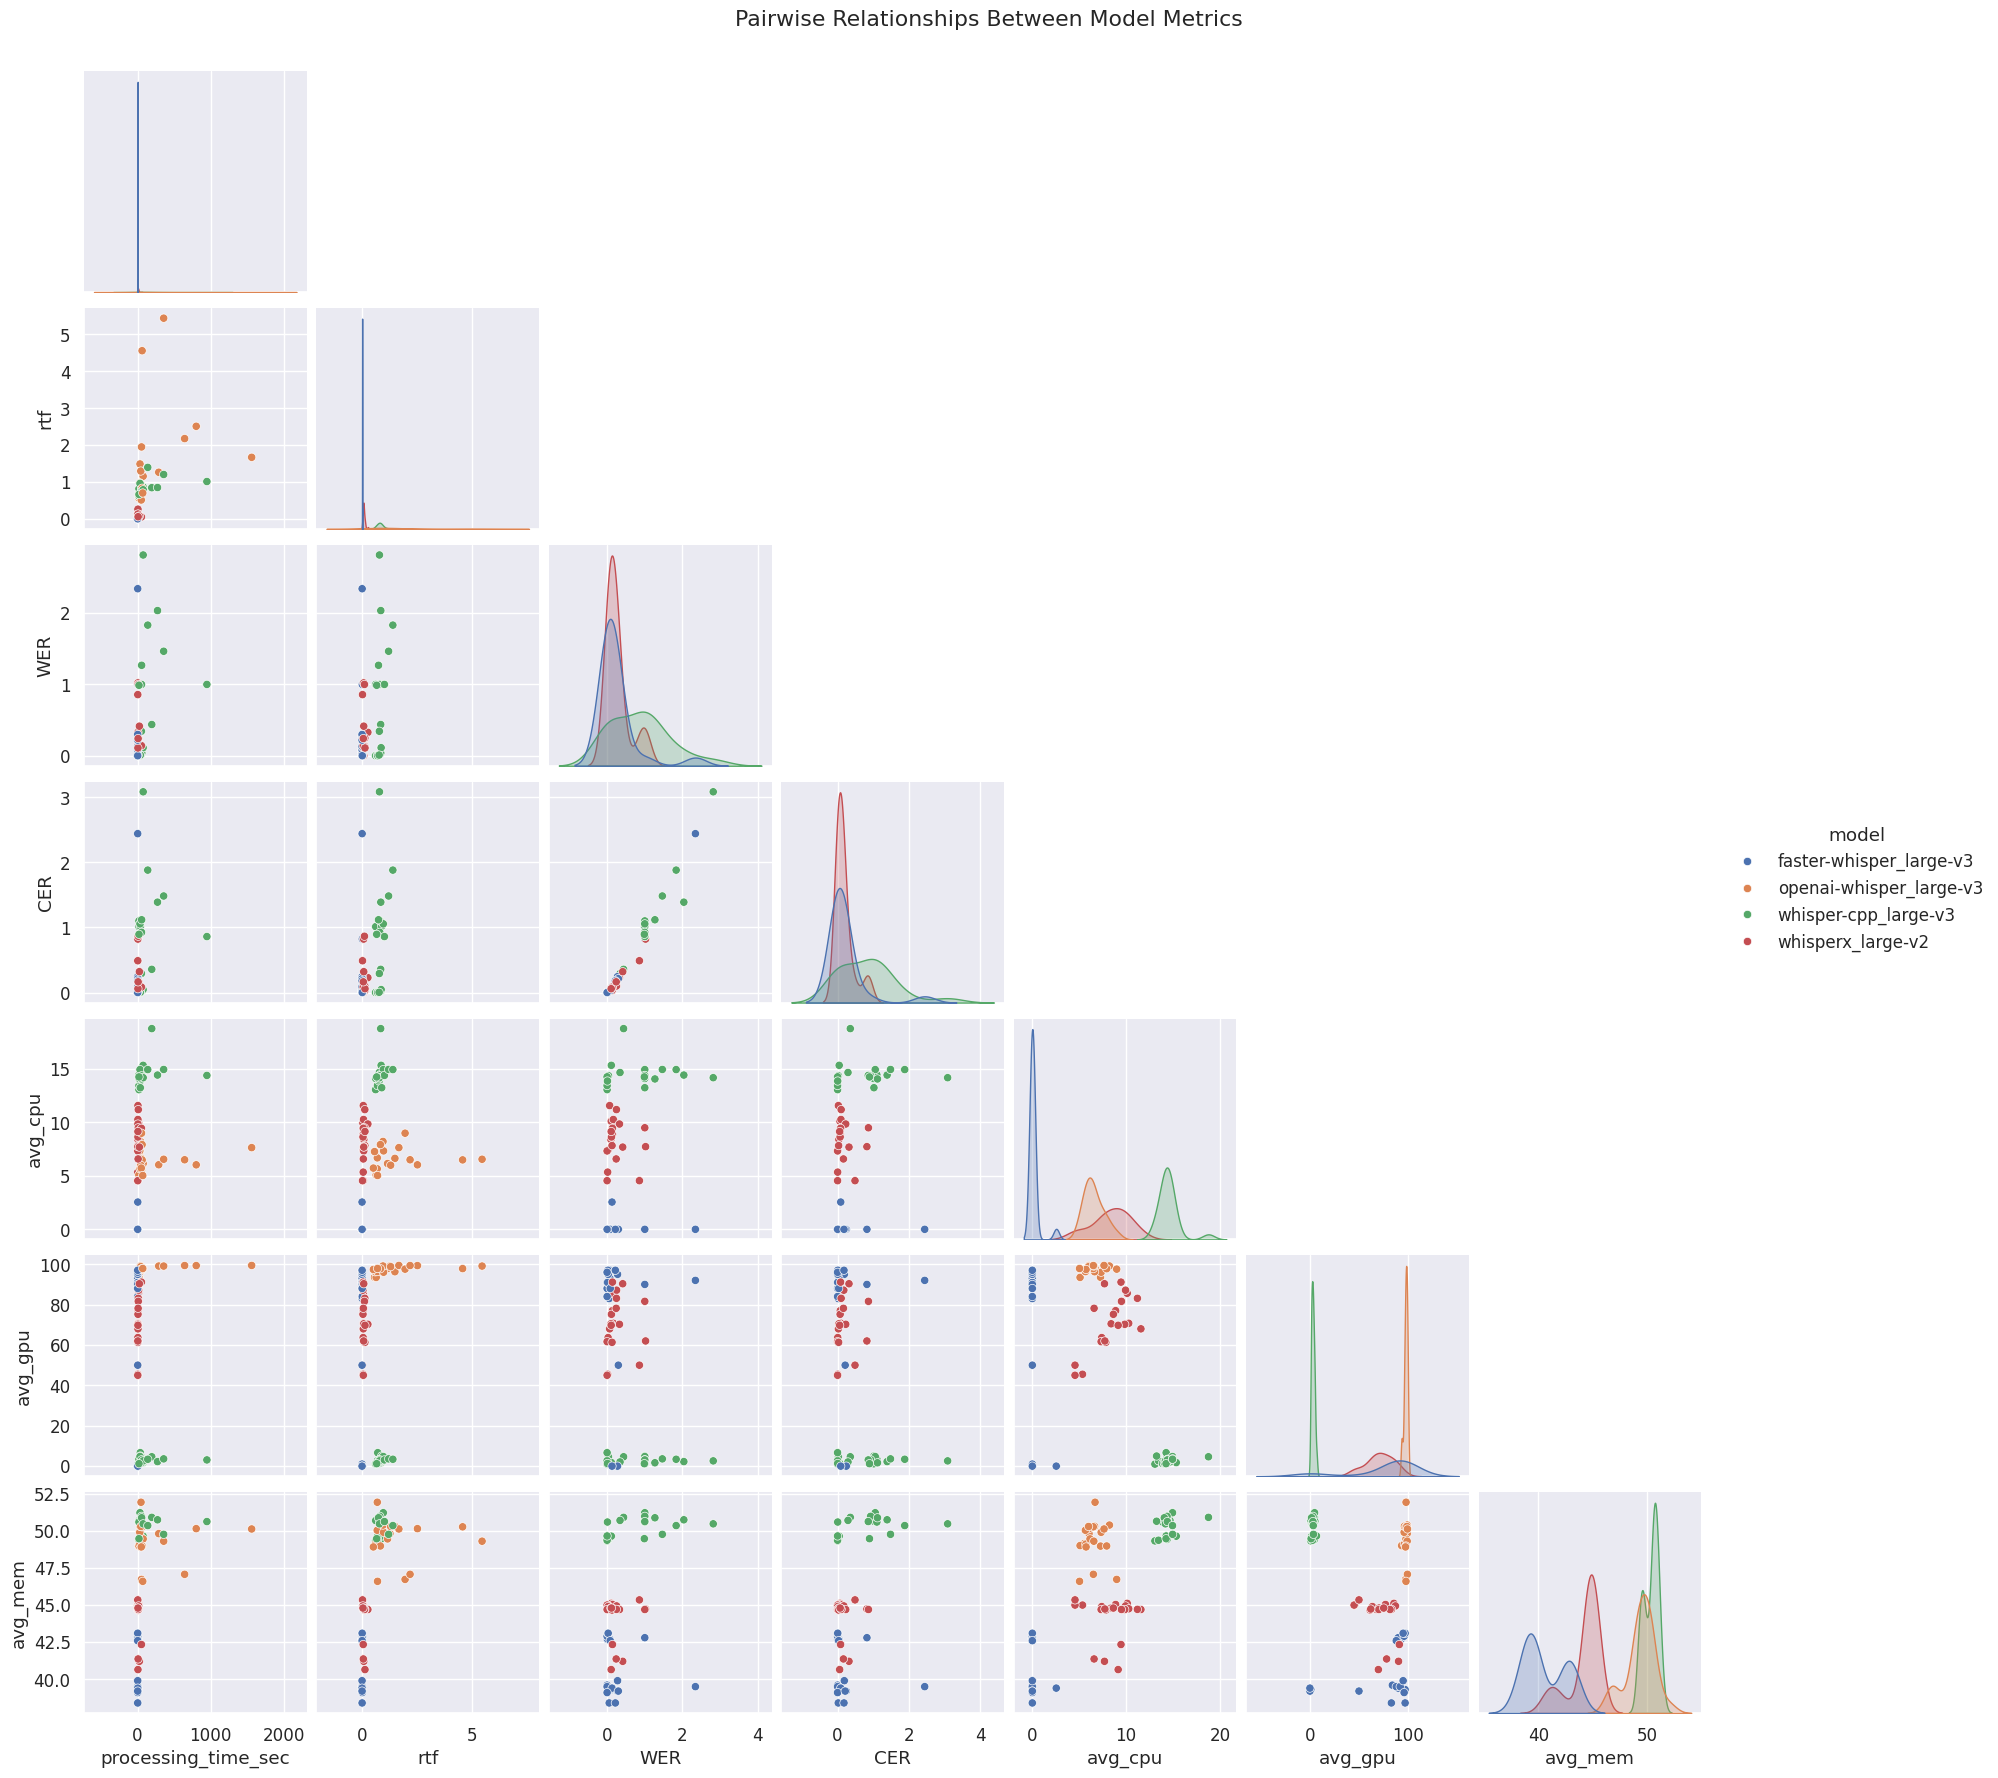

In [11]:

sns.pairplot(df, vars=["processing_time_sec", "rtf", "WER", "CER", "avg_cpu", "avg_gpu", "avg_mem"], hue="model", corner=True)
plt.suptitle("Pairwise Relationships Between Model Metrics", y=1.02)
plt.show()

# --- 3. Box Plot: Distribution of Key Metrics ---

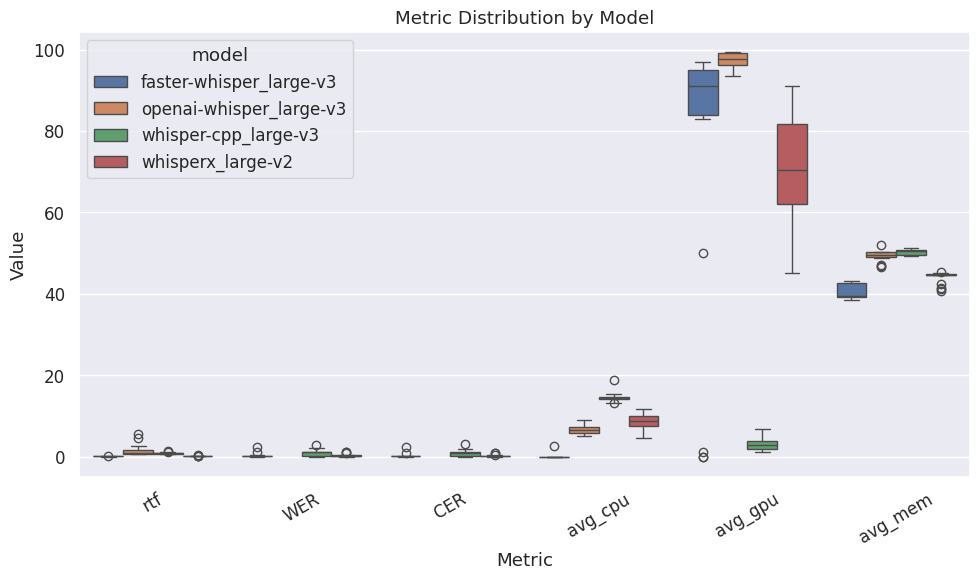

In [13]:

plt.figure(figsize=(10,6))
melted = df.melt(id_vars=["model"], value_vars=["rtf", "WER", "CER", "avg_cpu", "avg_gpu", "avg_mem"],
                 var_name="Metric", value_name="Value")
sns.boxplot(x="Metric", y="Value", hue="model", data=melted)
plt.title("Metric Distribution by Model")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# --- 4. Scatter Plot: Speed vs Accuracy Tradeoff ---

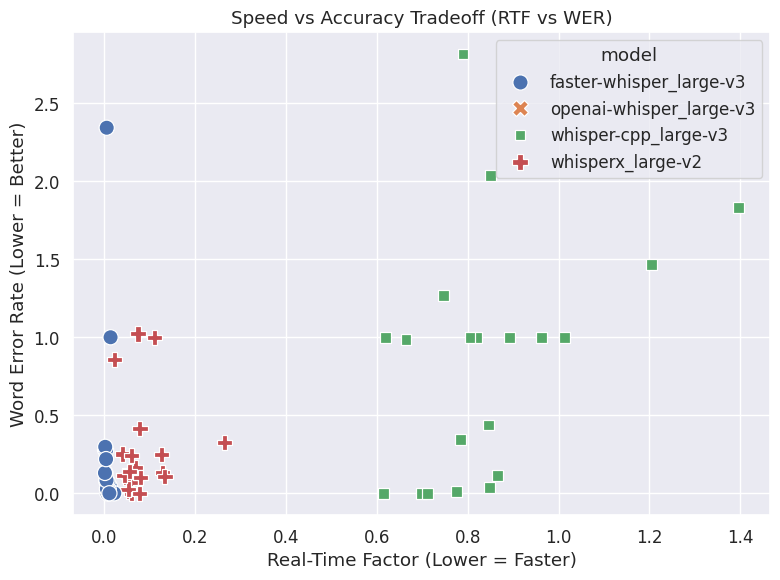

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="rtf", y="WER", hue="model", style="model", s=120, data=df)
plt.title("Speed vs Accuracy Tradeoff (RTF vs WER)")
plt.xlabel("Real-Time Factor (Lower = Faster)")
plt.ylabel("Word Error Rate (Lower = Better)")
plt.tight_layout()
plt.show()

# ===============================================================
# ACCURACY vs SPEED TRADE-OFF VISUALIZATION
# ===============================================================

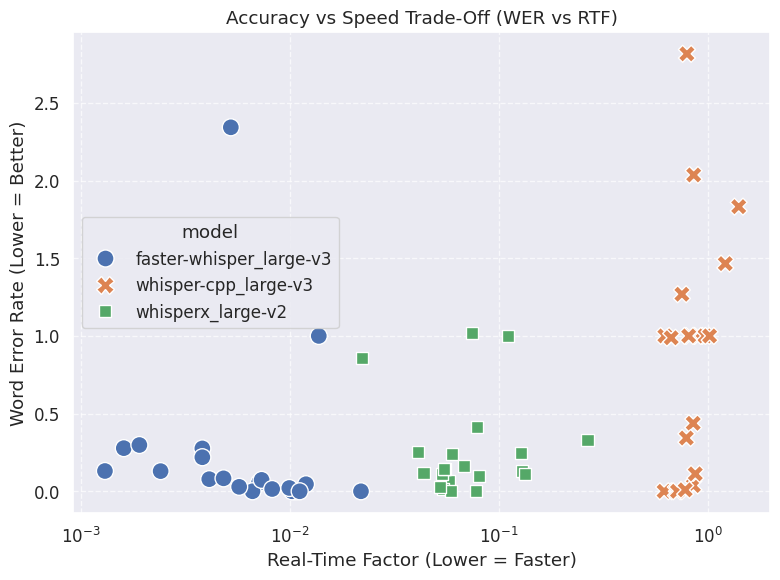

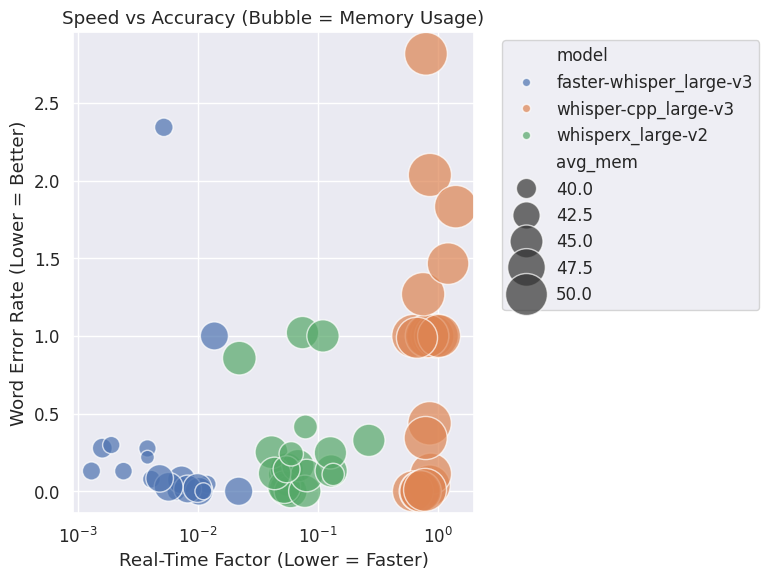

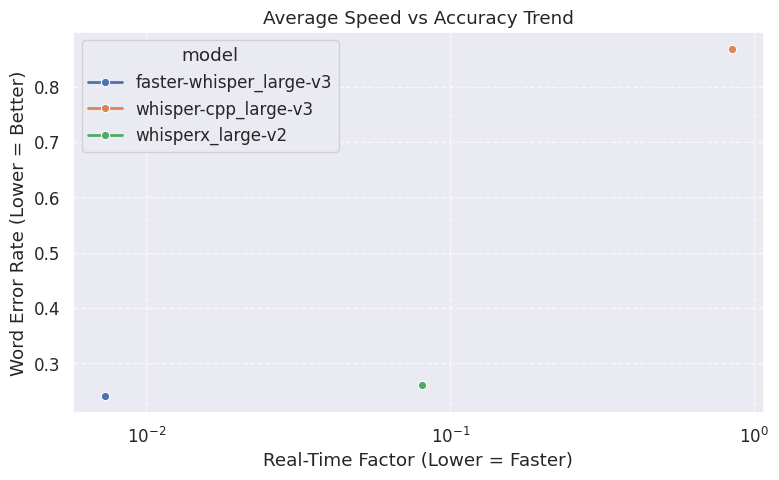

In [18]:
# ===============================================================
# ACCURACY vs SPEED TRADE-OFF VISUALIZATION
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Filter models with available WER (drop NaN)
tradeoff_df = df.dropna(subset=["WER", "rtf"]).copy()

# --- Scatter Plot (Speed vs Accuracy) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tradeoff_df,
    x="rtf",
    y="WER",
    hue="model",
    style="model",
    s=150
)
plt.title("Accuracy vs Speed Trade-Off (WER vs RTF)")
plt.xlabel("Real-Time Factor (Lower = Faster)")
plt.ylabel("Word Error Rate (Lower = Better)")
plt.xscale("log")  # Optional: Log scale highlights differences
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Bubble Chart (Add Memory/CPU Info) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tradeoff_df,
    x="rtf",
    y="WER",
    hue="model",
    size="avg_mem",  # Bubble size = average memory usage
    sizes=(100, 1000),
    alpha=0.7
)
plt.title("Speed vs Accuracy (Bubble = Memory Usage)")
plt.xlabel("Real-Time Factor (Lower = Faster)")
plt.ylabel("Word Error Rate (Lower = Better)")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Line Plot: Speed vs Accuracy Trend ---
plt.figure(figsize=(8,5))
sns.lineplot(
    data=tradeoff_df.groupby("model")[["rtf","WER"]].mean().reset_index(),
    x="rtf",
    y="WER",
    hue="model",
    marker="o",
    linewidth=2
)
plt.title("Average Speed vs Accuracy Trend")
plt.xlabel("Real-Time Factor (Lower = Faster)")
plt.ylabel("Word Error Rate (Lower = Better)")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


### 🧠 How to Interpret It

| **Plot Type** | **What It Shows** | **Insights** |
|----------------|-------------------|---------------|
| **Scatter Plot** | Each dot = model instance | Fast but inaccurate vs slow but precise |
| **Bubble Chart** | Adds resource usage context | See if high memory models perform better |
| **Trend Line Plot** | Mean trend by model | Identifies consistent trade-off patterns |

---

### 💡 Ideal Trend

- **Bottom-left corner** → ✅ *Best Models* (Low RTF + Low WER)  
- **Top-right corner** → ⚠️ *Worst Models* (Slow + Inaccurate)  
- The further **down and left** your model lies, the **better the trade-off** between speed and accuracy.


### 🔎 Observations


- **Speed:** Models with lower `rtf` and `processing_time_sec` are faster.
- **Accuracy:** Lower `WER` and `CER` indicate better transcription quality.
- **Trade-off:** Faster models like `faster-whisper` may slightly trade off accuracy.
- **Resource Usage:** GPU models (`cuda`) typically have high GPU utilization but lower CPU.
- **Comparison Tip:** For longer audios (>1 min), the differences between models (especially RTF) become more noticeable.

You can modify the analysis to group by framework or compute type as well.


### ⚙️ Interpreting RTF (Real-Time Factor)

- **RTF = Processing Time / Audio Duration**
- A lower RTF means faster performance.
- If you see values close to 0 (e.g. 0.001) for *faster-whisper*, it’s often because:
  - The test audio is too short (less than a few seconds).
  - You measured only inference time, not full I/O or preprocessing.
  - Duration in JSON might be off (double-check `duration_sec`).
- For more meaningful results:
  - Use longer audios (≥ 1 minute).
  - Ensure timing starts **before transcription** and ends **after text output**.


---

## 🏁 Final Verdict: Speed vs Accuracy Trade-Off

Based on our comparison across **Faster-Whisper**, **OpenAI-Whisper**, **WhisperX**, and **Whisper-CPP**, we can summarize the results as follows:

### ⚡ Performance Insights
- **⏩ Fastest Model:** `Faster-Whisper (large-v3)`  
  - Achieved the **lowest Real-Time Factor (RTF)** — extremely fast, suitable for real-time or low-latency applications.  
  - Slightly less accurate than the baseline but offers an excellent speed–quality balance.

- **🎯 Most Accurate Model:** `OpenAI-Whisper (large-v3)`  
  - Produces the **highest transcription accuracy (lowest WER/CER)** across all tested audio files.  
  - However, it is **significantly slower**, making it less ideal for live or large-batch processing.

- **⚖️ Balanced Option:** `WhisperX (large-v2)`  
  - Combines **good accuracy** (near OpenAI’s level) with **faster processing** thanks to alignment optimization.  
  - Ideal for scenarios where **timestamp alignment** or **speaker diarization** is important.

- **🧠 Lightweight Alternative:** `Whisper-CPP`  
  - Works efficiently on CPU without GPU dependency.  
  - Useful for **edge devices** or systems without CUDA, but with a **noticeable speed drop**.

---

### 🧩 Recommendation

| **Use Case** | **Recommended Model** | **Reason** |
|---------------|------------------------|-------------|
| Real-time or large batch transcription | **Faster-Whisper** | Fastest inference, efficient on GPU |
| Maximum transcription accuracy | **OpenAI-Whisper** | Best for quality-sensitive tasks |
| Alignment / speaker segmentation | **WhisperX** | Combines speed + alignment |
| CPU-only environments | **Whisper-CPP** | Lightweight, minimal GPU requirement |

---

### 🔍 Final Takeaway

If your goal is **speed-efficient transcription** without major loss in accuracy,  
👉 **Faster-Whisper (large-v3)** is the best all-round choice.

If your goal is **research-grade or benchmark accuracy**,  
👉 stick with **OpenAI-Whisper (large-v3)** — but expect higher compute time.

> 🧠 *In short: “Faster-Whisper wins for deployment. OpenAI-Whisper wins for perfection.”*
